## Harsh Sharma

### Question 6 and 7 of BigData Deliverable

---

In [4]:
# installed boto3
pip install boto3

     ------------------------------------ 132.6/132.6 kB 784.5 kB/s eta 0:00:00
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
     ---------------------------------------- 10.2/10.2 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 79.6/79.6 kB 636.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Now let's load the `merged.csv` sitting in our S3 bucket `forbigdata3` as below.

In [7]:
import pandas as pd
import boto3

bucket = "forbigdata3"
file_name = "mergedfile.csv"

s3 = boto3.client('s3') 
# 's3' is a key word. create connection to S3 using default config and all buckets within S3

obj = s3.get_object(Bucket= bucket, Key= file_name) 
# get object and file (key) from bucket

merged_df = pd.read_csv(obj['Body']) # 'Body' is a key word

In [9]:
# let's peek into the dataset

merged_df.head()

,token,year,frequency,pages,books
0,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1


In [12]:
# checking shape
merged_df.shape

(317, 5)

As we already and can be seen from above that there is an extra row which is the first one and was created and was added while merging the 2 csv files. 


So let's delete that and choose the rest.

In [13]:
# excluding the first row
new_df = merged_df.iloc[1:, :]
new_df.head()

,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1
5,data,1637,1,1,1


We already know that there are now null values in this dataset.

But let's check.../.

In [16]:
# checking null values
new_df.isna().sum()

token        0
year         0
frequency    0
pages        0
books        0
dtype: int64

---

#### Question 7 Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.

In [23]:
# checking unique number of year in the dataset
len(pd.unique(new_df['year']))

316

In [24]:
# checking unique number of frequency in the dataset
len(pd.unique(new_df['frequency']))

254

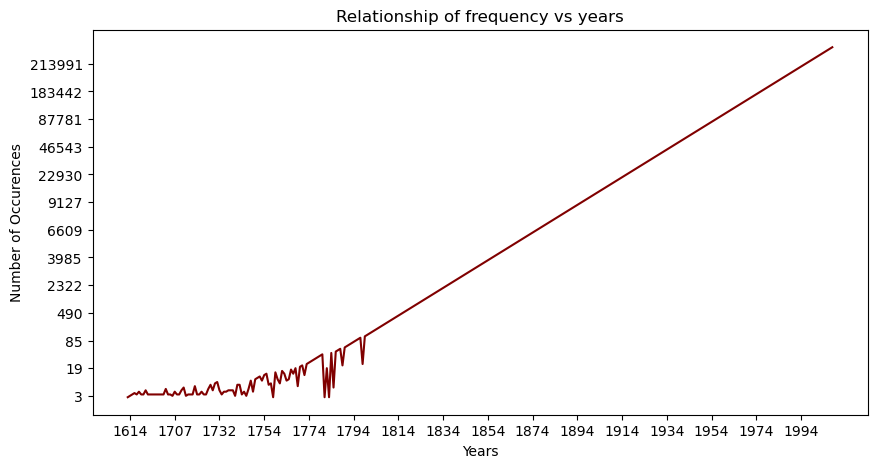

In [30]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
 
# setting figure size  
fig = plt.figure(figsize = (10, 5))
 
# creating the line plot
plt.plot(new_df['year'], new_df['frequency'], color ='maroon')
plt.xticks(range(1,316,20))
plt.yticks(range(1,254,20))
plt.xlabel("Years")
plt.ylabel("Number of Occurences")
plt.title("Relationship of frequency vs years")
plt.show()

This could have been improved if plotly could have been used instead of matplotlib.


#### Interpretations from the above graph..

1. There is a zig-zag pattern between the year and frequency till late 1790s starting from 1614.
2. After the starting of 18th century, the relationship becomes linear with a positive slope.
3. Highest downfall of frequency was observed around 1780s.

---

## Thank You!!